In [1]:
from cmdstanpy import CmdStanModel
import pandas as pd
#import arviz as az 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
from sklearn.metrics import mean_squared_error

In [2]:
import cmdstanpy
cmdstanpy.install_cmdstan()

CmdStan install directory: /Users/adrian/.cmdstan
Installing CmdStan version: 2.34.0
Download successful, file: /var/folders/9n/r4vjq9192fgcm1vns8j8f8kw0000gn/T/tmp7n3d5qrm
Extracting distribution
Unpacked download as cmdstan-2.34.0
Building version cmdstan-2.34.0, may take several minutes, depending on your system.
Installed cmdstan-2.34.0
Test model compilation


17:22:32 - cmdstanpy - WARNING - CmdStan installation failed.
Command "make examples/bernoulli/bernoulli" failed:
Command ['make', 'examples/bernoulli/bernoulli']
	error during processing No such file or directory


False

In [17]:
from cmdstanpy import rebuild_cmdstan
rebuild_cmdstan()

 (00:00) |            | Building CmdStan                     

CmdStanInstallError: Command "make examples/bernoulli/bernoulli" failed:
Command ['make', 'examples/bernoulli/bernoulli']
	error during processing No such file or directory

In [16]:
model = CmdStanModel(stan_file='gp_cheb_matern.stan')

ValueError: Failed to get source info for Stan model '/Users/adrian/Desktop/chebyshev/gp_cheb_matern.stan'. Console:
/opt/anaconda3/bin/cmdstan/bin/stanc: unknown option '--info'.
Usage: stanc [option] ... <model_file.stan>
  --debug-lex                      For debugging purposes: print the lexer actions
  --debug-parse                    For debugging purposes: print the parser actions
  --debug-ast                      For debugging purposes: print the undecorated AST, before semantic checking
  --debug-decorated-ast            For debugging purposes: print the decorated AST, after semantic checking
  --debug-generate-data            For debugging purposes: generate a mock dataset to run the model on
  --debug-mir                      For debugging purposes: print the MIR as an S-expression.
  --debug-mir-pretty               For debugging purposes: pretty-print the MIR.
  --debug-optimized-mir            For debugging purposes: print the MIR after it's been optimized. Only has an effect when optimizations are turned on.
  --debug-optimized-mir-pretty     For debugging purposes: pretty print the MIR after it's been optimized. Only has an effect when optimizations are turned on.
  --debug-transformed-mir          For debugging purposes: print the MIR after the backend has transformed it.
  --debug-transformed-mir-pretty   For debugging purposes: pretty print the MIR after the backend has transformed it.
  --dump-stan-math-signatures Dump out the list of supported type signatures for Stan Math backend.
  --warn-uninitialized             Emit warnings about uninitialized variables to stderr. Currently an experimental feature.
  --warn-pedantic                  Emit warnings about common mistakes in Stan programs.
  --auto-format                    Pretty prints the program to the console
  --print-canonical                Prints the canonicalized program to the console
  --version                        Display stanc version number
  --name                           Take a string to set the model name (default = "$model_filename_model")
  --O Allow                        the compiler to apply all optimizations to the Stan code.
  --o                              Take the path to an output file for generated C++ code (default = "$name.hpp")
  --print-cpp                      If set, output the generated C++ Stan model class to stdout.
  --allow-undefined                Do not fail if a function is declared but not defined
  --allow_undefined                Deprecated. Same as --allow-undefined.
  --include-paths                  Takes a comma-separated list of directories that may contain a file in an #include directive (default = "")
  --include_paths                  Deprecated. Same as --include-paths.
  --use-opencl                     If set, try to use matrix_cl signatures.
  --standalone-functions           If set, the generated C++ will be the standalone functions C++ code.
  -help                            Display this list of options
  --help                           Display this list of options


In [121]:
model = CmdStanModel(stan_file='gp_cheb.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


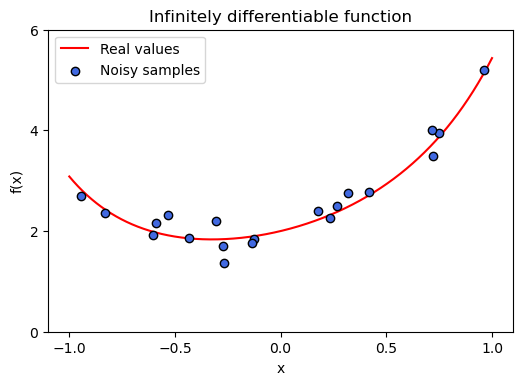

In [122]:
# Generate data for quadratic function with random noise e
def generate_data(n):
  x = np.random.uniform(-1,1,size=(n,1))
  # y = -np.square(x)+2
  #y = np.exp(x)*np.sin(np.pi*x) + x

  #rbf
  y = np.exp(x) + np.exp(x**2)

  return (x.ravel(),y.ravel())

n = 20
x,y = generate_data(n)
noise = np.random.normal(0,0.2,n)
y = y + noise
fig, ax = plt.subplots(dpi=100)

x = [0.32080647, 0.26587014, 0.72187268, -0.30351804, 0.2354536, -0.83286119,
                  -0.12406531, 0.75046623, 0.17505236, -0.43120703, -0.26736266, 0.41574915,
                  -0.13673504, -0.53063669, -0.58944929, 0.71710496, 0.96346998, -0.60412132,
                  -0.27278486, -0.94576153]

y = [2.76114155, 2.49891946, 3.49267932, 2.19077668, 2.25096868, 2.3522071,
            1.84837552, 3.94204235, 2.39402669, 1.86377928, 1.36257218, 2.76642226,
            1.76145556, 2.32005902, 2.16071458, 4.01261904, 5.19621366, 1.92165487,
            1.70098854, 2.6992103]

x_real,y_real = generate_data(10000)
x_real, y_real = zip(*sorted(zip(x_real, y_real)))
plt.plot(x_real,y_real, color="red", label="Real values", zorder=1)
plt.scatter(x,y,label="Noisy samples",edgecolors= "black", color='royalblue', zorder=2)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.locator_params(nbins=5, axis='x')
plt.locator_params(nbins=5, axis='y')
plt.ylim(ymin=0, ymax=6)
plt.title("Infinitely differentiable function")
plt.savefig("img_new/function_rbf.pdf")


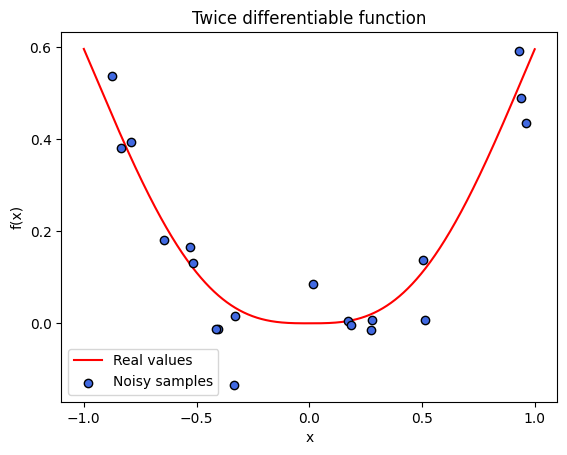

In [12]:
# Generate data for quadratic function with random noise e
def generate_data(n):
  x = np.random.uniform(-1,1,size=(n,1))
  # y = -np.square(x)+2
  #y = np.exp(x)*np.sin(np.pi*x) + x

  #matern
  y = np.abs(np.sin(x))**3
  return (x.ravel(),y.ravel())

n = 20
x,y = generate_data(n)
noise = np.random.normal(0,0.08,n)
y = y + noise
fig, ax = plt.subplots(dpi=100)

# x = [-0.21558522, -0.1329833, 0.08068001, 0.86035093, 0.76285724, -0.64821812, 0.27034352, 0.6716487, -0.19474706, 0.59998129, 0.86436037, -0.30727194, -0.41886138, 0.21547172, -0.84083455, -0.62773623, 0.93725498, -0.56009593, 0.94870193, 0.02186769]
# y = [-0.39898039, -0.34918657, -0.11447868, -0.20011555, 0.44504202, -1.64524772, 0.09360612, 0.33980915, -0.42562159, 0.2208891, 0.15916043, -0.65115996, -0.80375508, 0.15148805, -2.57718936, -1.83607748, 0.13775842, -1.47140522, 0.18098801, 0.21166059]

# x = [-0.33381885, -0.79091841,  0.27223306,  0.27779046, -0.51699201,
#         0.93058889,  0.1719841 , -0.40513138,  0.93712956, -0.8743655 ,
#        -0.52829121,  0.0145146 , -0.64629545,  0.18302552, -0.41170388,
#        -0.83360254,  0.95858062, -0.32951421,  0.50523988,  0.51365247]

# y = [-0.13376833,  0.39312906, -0.01467015,  0.00642972,  0.12990343,
#         0.59090656,  0.00536345, -0.01253035,  0.48871982,  0.53708184,
#         0.16548415,  0.08476546,  0.18023822, -0.00469403, -0.01156783,
#         0.37974538,  0.43476208,  0.01564344,  0.1378438 ,  0.00657662]

x_real,y_real = generate_data(10000)
x_real, y_real = zip(*sorted(zip(x_real, y_real)))
plt.plot(x_real,y_real, color="red", label="Real values", zorder=1)
plt.scatter(x,y,label="Noisy samples",edgecolors= "black", color='royalblue', zorder=2)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.locator_params(nbins=5, axis='x')
plt.locator_params(nbins=5, axis='y')
# plt.ylim(ymin=0, ymax=6)
plt.title("Twice differentiable function")
plt.savefig("img_new/function_mat.pdf")


In [13]:
x

array([-0.33381885, -0.79091841,  0.27223306,  0.27779046, -0.51699201,
        0.93058889,  0.1719841 , -0.40513138,  0.93712956, -0.8743655 ,
       -0.52829121,  0.0145146 , -0.64629545,  0.18302552, -0.41170388,
       -0.83360254,  0.95858062, -0.32951421,  0.50523988,  0.51365247])

In [14]:
y

array([-0.13376833,  0.39312906, -0.01467015,  0.00642972,  0.12990343,
        0.59090656,  0.00536345, -0.01253035,  0.48871982,  0.53708184,
        0.16548415,  0.08476546,  0.18023822, -0.00469403, -0.01156783,
        0.37974538,  0.43476208,  0.01564344,  0.1378438 ,  0.00657662])

In [15]:
def convert_to_superscript(input_str):
    superscript_mapping = {
        '0': '⁰',
        '1': '¹',
        '2': '²',
        '3': '³',
        '4': '⁴',
        '5': '⁵',
        '6': '⁶',
        '7': '⁷',
        '8': '⁸',
        '9': '⁹',
        '-': '⁻'
    }

    # Convert each character to superscript
    superscript_result = ''.join(superscript_mapping.get(char, char) for char in input_str)

    return superscript_result


def format_scientific_notation(number):
    # Calculate the exponent
    exponent = 0
    while abs(number) >= 10:
        number /= 10
        exponent += 1
    while abs(number) < 1:
        number *= 10
        exponent -= 1
    exponent = convert_to_superscript(str(exponent))
    # Format the result
    formatted_result = f"{number:.2f} * 10{exponent}"

    return formatted_result

format_scientific_notation(0.00000123)

'1.23 * 10⁻⁶'

In [119]:
n=30
k = np.arange(n) +1
x_nodes = np.cos((np.pi) * (2*k-1)/(2*n))
data={'x1':x,'y1':y, 'N1':len(x),'x2':x_nodes,'N2':len(x_nodes)}

Loop test

In [39]:
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

loop_n = [10, 20, 30, 50, 70, 100, 150, 200]#, 300, 500] #, 1000]
for n in loop_n:
    start = datetime.now()
    
    k = np.arange(n) +1
    x_nodes = np.cos((np.pi) * (2*k-1)/(2*n))
    data={'x1':x,'y1':y, 'N1':len(x),'x2':x_nodes,'N2':len(x_nodes)}
    result = model.sample(data=data, chains = 4)
    # result.summary()
    temp = result.summary().loc['y2[1]':,'Mean':'Mean']
    temp2 = result.summary().loc['y2[1]':,'StdDev':'StdDev']

    # plt.figure(figsize=(6, 4))
    # plt.scatter(x_nodes,temp['Mean'],color="royalblue",linewidth=0.1,label="Mean value",  zorder = 1, edgecolors= "black")
    # plt.errorbar(x_nodes,temp['Mean'],temp2['StdDev']*1.95,alpha=0.25,ls='none',color="cornflowerblue", label = "95% confidence interval",  zorder = 0)
    # plt.title("Order N = {}".format(n))
    # plt.xlabel("x")
    # plt.ylabel("f(x)")
    # plt.locator_params(nbins=5, axis='x')
    # plt.locator_params(nbins=5, axis='y')
    # # plt.ylim(ymin=0, ymax=6)
    # plt.legend()

    # name = "img_new/mat/distribution-"+str(n)+".pdf"
    # plt.savefig(name)

    coef_matrix = result.stan_variable('y2')
    for count,value in enumerate(coef_matrix):
        extended_vector = np.append(np.flip(value),value[1:-1],0)
        fourier_coeffs = np.real(np.fft.fft(extended_vector))
        cheb_coef = fourier_coeffs[:n]/n
        cheb_coef[0] = cheb_coef[0]/2
        cheb_coef[-1] = cheb_coef[-1]/2
        coef_matrix[count] = cheb_coef
    np.set_printoptions(suppress=True)
    coef_matrix[0]

    final_result = np.mean(coef_matrix,axis=0)

    test = abs(final_result)
    x_plt = np.arange(0, n) 
    x_plt = x_plt + 1
    # plt.figure(figsize=(6, 4))
    # plt.scatter(x_plt,test,color='royalblue',label = "Coefficient values")
    # plt.yscale('log')
    # plt.title("Order N = {}".format(n))
    # plt.ylabel("Value")
    # plt.xlabel("Coefficient order")
    # xticks = plt.xticks()

    # plt.yticks([max(test), min(test)], labels=["{:.2E}".format(max(test)), "{:.1E}".format(min(test))])
    # plt.xticks([min(x_plt), max(x_plt)], labels=[min(x_plt), max(x_plt)])
    # plt.legend()

    # name = "img_new/mat/order-"+str(n)+".pdf"
    # plt.savefig(name, bbox_inches="tight")
    
    end = datetime.now()
    print("N = ", n)
    print("Elapsed", (end - start).total_seconds()/60, "minutes")

    # plt.axhline(y = 0.0005, color = 'r', linestyle = '-',alpha=0.5)

 

INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing


N =  10
Elapsed 0.16076563333333332 minutes


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing


N =  20
Elapsed 0.26237668333333336 minutes


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing


N =  30
Elapsed 0.4155873666666666 minutes


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing


N =  50
Elapsed 0.7918988166666666 minutes


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing


N =  70
Elapsed 1.3521188166666667 minutes


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing


N =  100
Elapsed 2.5240695833333335 minutes


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing


N =  150
Elapsed 5.141280816666667 minutes


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

KeyboardInterrupt: 

INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing


N =  10
Elapsed 0.08919416666666667 minutes


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing


N =  30
Elapsed 0.2165771 minutes


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing


N =  70
Elapsed 0.6723421833333333 minutes


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.



N =  200
Elapsed 4.423640383333334 minutes


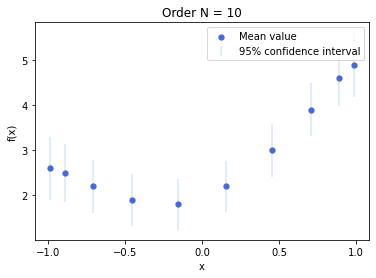

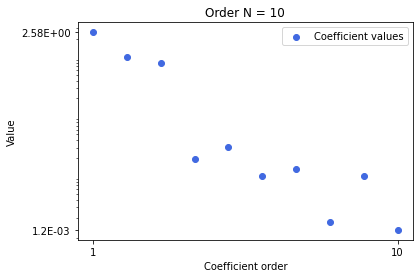

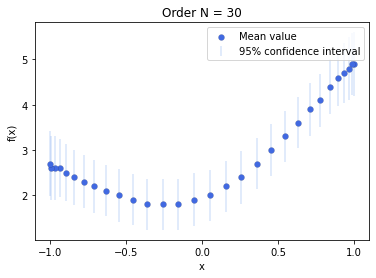

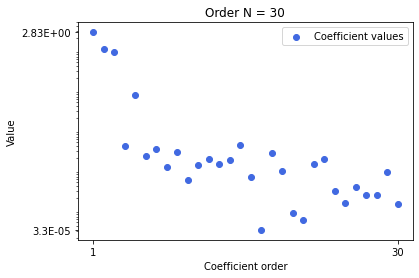

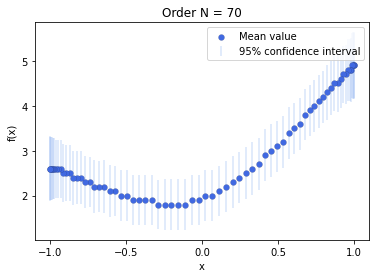

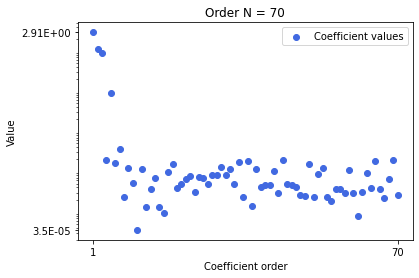

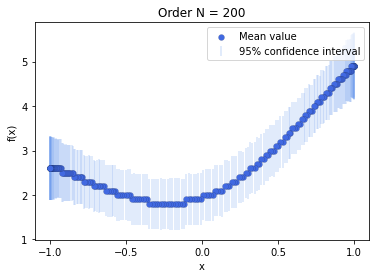

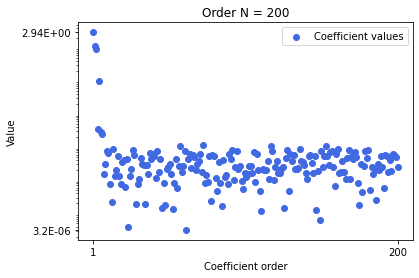

In [123]:
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

loop_n = [10, 30, 70, 200]#, 300, 500] #, 1000]
for n in loop_n:
    start = datetime.now()
    
    k = np.arange(n) +1
    x_nodes = np.cos((np.pi) * (2*k-1)/(2*n))
    data={'x1':x,'y1':y, 'N1':len(x),'x2':x_nodes,'N2':len(x_nodes)}
    result = model.sample(data=data, chains = 4)
    # result.summary()
    temp = result.summary().loc['y2[1]':,'Mean':'Mean']
    temp2 = result.summary().loc['y2[1]':,'StdDev':'StdDev']

    plt.figure(figsize=(6, 4))
    plt.scatter(x_nodes,temp['Mean'],color="royalblue",linewidth=0.1,label="Mean value",  zorder = 1, edgecolors= "black")
    plt.errorbar(x_nodes,temp['Mean'],temp2['StdDev']*1.95,alpha=0.25,ls='none',color="cornflowerblue", label = "95% confidence interval",  zorder = 0)
    plt.title("Order N = {}".format(n))
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.locator_params(nbins=5, axis='x')
    plt.locator_params(nbins=5, axis='y')
    # plt.ylim(ymin=0, ymax=6)
    plt.legend()

    name = "img_new/rbf/distribution-"+str(n)+".pdf"
    plt.savefig(name)

    coef_matrix = result.stan_variable('y2')
    for count,value in enumerate(coef_matrix):
        extended_vector = np.append(np.flip(value),value[1:-1],0)
        fourier_coeffs = np.real(np.fft.fft(extended_vector))
        cheb_coef = fourier_coeffs[:n]/n
        cheb_coef[0] = cheb_coef[0]/2
        cheb_coef[-1] = cheb_coef[-1]/2
        coef_matrix[count] = cheb_coef
    np.set_printoptions(suppress=True)
    coef_matrix[0]

    final_result = np.mean(coef_matrix,axis=0)

    test = abs(final_result)
    x_plt = np.arange(0, n) 
    x_plt = x_plt + 1
    plt.figure(figsize=(6, 4))
    plt.scatter(x_plt,test,color='royalblue',label = "Coefficient values")
    plt.yscale('log')
    plt.title("Order N = {}".format(n))
    plt.ylabel("Value")
    plt.xlabel("Coefficient order")
    xticks = plt.xticks()

    # plt.yticks([max(test), min(test)], labels=["{:.2E}".format(max(test)), "{:.1E}".format(min(test))])
    # plt.xticks([min(x_plt), max(x_plt)], labels=[min(x_plt), max(x_plt)])
    # plt.legend()

    plt.yticks([max(test), min(test)], labels=[format_scientific_notation(max(test)), format_scientific_notation(min(test))])
    plt.xticks([min(x_plt), max(x_plt)], labels=[min(x_plt), max(x_plt)])
    plt.legend()

    name = "img_new/rbf/order-"+str(n)+".pdf"
    plt.savefig(name, bbox_inches="tight")
    
    end = datetime.now()
    print("N = ", n)
    print("Elapsed", (end - start).total_seconds()/60, "minutes")

    # plt.axhline(y = 0.0005, color = 'r', linestyle = '-',alpha=0.5)

 

In [133]:
import pandas as pd

# Specify the path to the CSV file
csv_file_path = "pfile.csv"

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file_path)

# Now, df contains the data from the CSV file
df


,x_plt,test,x,avg,sdev
0,1,7.748763e-01,-0.999969,-2.661552,0.453908
1,2,1.469396e+00,-0.999722,-2.661551,0.453907
2,3,6.324183e-01,-0.999229,-2.661547,0.453899
3,4,3.157345e-02,-0.998489,-2.661535,0.453875
4,5,1.061984e-01,-0.997503,-2.661505,0.453818
...,...,...,...,...,...
195,196,4.337450e-08,0.997503,0.107504,0.199400
196,197,2.361385e-07,0.998489,0.107501,0.199464
197,198,1.278458e-07,0.999229,0.107500,0.199491
198,199,6.295037e-08,0.999722,0.107500,0.199499


N =  200
Elapsed 0.0032268 minutes


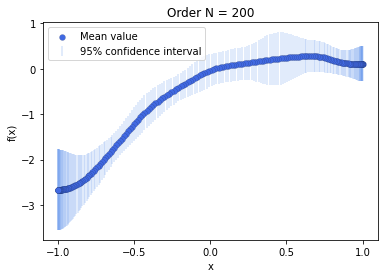

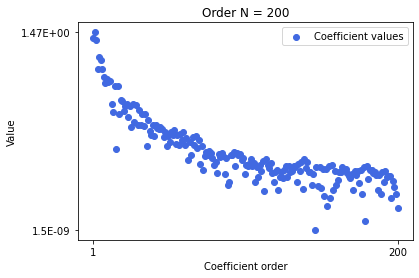

In [136]:
x_plt = df['x_plt']
test = df['test']
x = df['x']
avg = df['avg']
sdev = df['sdev']

n = 200

start = datetime.now()

x = x[::-1]
avg = avg[::-1]
sdev = sdev[::-1]

plt.figure(figsize=(6, 4))
plt.scatter(x_nodes,avg,color="royalblue",linewidth=0.1,label="Mean value",  zorder = 1, edgecolors= "black")
plt.errorbar(x_nodes,avg,sdev*1.95,alpha=0.25,ls='none',color="cornflowerblue", label = "95% confidence interval",  zorder = 0)
plt.title("Order N = {}".format(n))
plt.xlabel("x")
plt.ylabel("f(x)")
plt.locator_params(nbins=5, axis='x')
plt.locator_params(nbins=5, axis='y')
# plt.ylim(ymin=0, ymax=6)
plt.legend()

name = "img_new/inla/mat/distribution-"+str(n)+".pdf"
plt.savefig(name)


x_plt = np.arange(0, n) 
x_plt = x_plt + 1
plt.figure(figsize=(6, 4))
plt.scatter(x_plt,test,color='royalblue',label = "Coefficient values")
plt.yscale('log')
plt.title("Order N = {}".format(n))
plt.ylabel("Value")
plt.xlabel("Coefficient order")
xticks = plt.xticks()

plt.yticks([max(test), min(test)], labels=["{:.2E}".format(max(test)), "{:.1E}".format(min(test))])
plt.xticks([min(x_plt), max(x_plt)], labels=[min(x_plt), max(x_plt)])
plt.legend()

name = "img_new/inla/mat/order-"+str(n)+".pdf"
plt.savefig(name, bbox_inches="tight")

end = datetime.now()
print("N = ", n)
print("Elapsed", (end - start).total_seconds()/60, "minutes")

# plt.axhline(y = 0.0005, color = 'r', linestyle = '-',alpha=0.5)

 

In [147]:
df

,x_plt,test,x,avg,sdev
0,1,0.656357,-0.987688,-2.724559,0.470680
1,2,1.293427,-0.891007,-2.647010,0.363821
2,3,0.602494,-0.707107,-2.058465,0.230186
3,4,0.044749,-0.453990,-0.978943,0.237370
4,5,0.030556,-0.156434,-0.295113,0.178636
5,6,0.078002,0.156434,0.129622,0.213594
6,7,0.024624,0.453990,0.180950,0.410214
7,8,0.017392,0.707107,0.321627,0.220652
8,9,0.026666,0.891007,0.091549,0.165701
9,10,0.032315,0.987688,0.108991,0.219873


N =  10
Elapsed 0.0035679333333333333 minutes


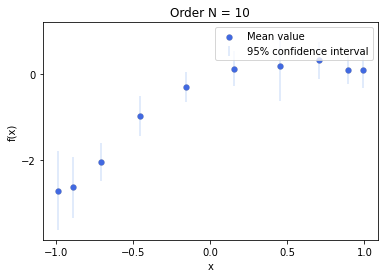

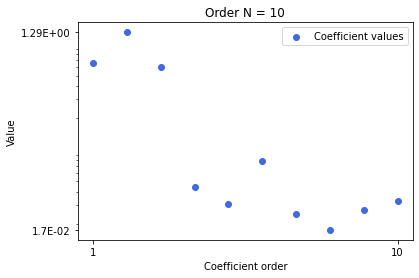

In [169]:
import pandas as pd
# Specify the path to the CSV file
csv_file_path = "pfile10.csv"

# Read the CSV file into a pandas DataFrame
df1 = pd.read_csv("pfile10.csv")
df = df1

x_plt = df['x_plt']
test = df['test']
x = df['x']
avg = df['avg']
sdev = df['sdev']

n = 10
start = datetime.now()

x = x[::-1]
avg = avg[::-1]
sdev = sdev[::-1]

plt.figure(figsize=(6, 4))
plt.scatter(x,avg,color="royalblue",linewidth=0.1,label="Mean value",  zorder = 1, edgecolors= "black")
plt.errorbar(x,avg,sdev*1.95,alpha=0.25,ls='none',color="cornflowerblue", label = "95% confidence interval",  zorder = 0)
plt.title("Order N = {}".format(n))
plt.xlabel("x")
plt.ylabel("f(x)")
plt.locator_params(nbins=5, axis='x')
plt.locator_params(nbins=5, axis='y')
# plt.ylim(ymin=0, ymax=6)
plt.legend()

name = "img_new/inla/mat/distribution-"+str(n)+".pdf"
plt.savefig(name)


x_plt = np.arange(0, n) 
x_plt = x_plt + 1
plt.figure(figsize=(6, 4))
plt.scatter(x_plt,test,color='royalblue',label = "Coefficient values")
plt.yscale('log')
plt.title("Order N = {}".format(n))
plt.ylabel("Value")
plt.xlabel("Coefficient order")
xticks = plt.xticks()

plt.yticks([max(test), min(test)], labels=["{:.2E}".format(max(test)), "{:.1E}".format(min(test))])
plt.xticks([min(x_plt), max(x_plt)], labels=[min(x_plt), max(x_plt)])
plt.legend()

name = "img_new/inla/mat/order-"+str(n)+".pdf"
plt.savefig(name, bbox_inches="tight")

end = datetime.now()
print("N = ", n)
print("Elapsed", (end - start).total_seconds()/60, "minutes")

# plt.axhline(y = 0.0005, color = 'r', linestyle = '-',alpha=0.5)

 

N =  200


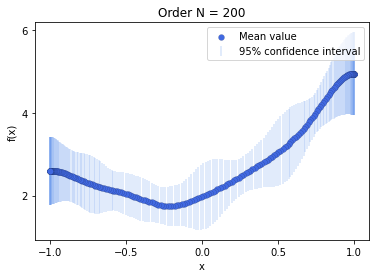

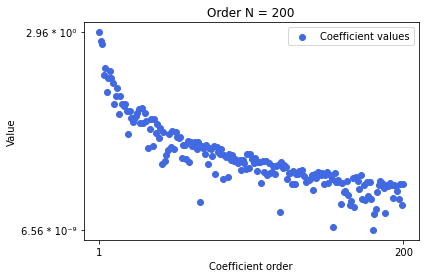

In [37]:
import pandas as pd
# Specify the path to the CSV file
csv_file_path = "pfile10.csv"

# Read the CSV file into a pandas DataFrame
df1 = pd.read_csv("ffile200.csv")
# df1 = pd.read_csv("rmat10.csv")
df = df1

x_plt = df['x_plt']
test = df['test']
x = df['x']
avg = df['avg']
sdev = df['sdev']

n = 200
# start = datetime.now()

x = x[::-1]
avg = avg[::-1]
sdev = sdev[::-1]

plt.figure(figsize=(6, 4))
plt.scatter(x,avg,color="royalblue",linewidth=0.1,label="Mean value",  zorder = 1, edgecolors= "black")
plt.errorbar(x,avg,sdev*1.95,alpha=0.25,ls='none',color="cornflowerblue", label = "95% confidence interval",  zorder = 0)
plt.title("Order N = {}".format(n))
plt.xlabel("x")
plt.ylabel("f(x)")
plt.locator_params(nbins=5, axis='x')
plt.locator_params(nbins=5, axis='y')
# plt.ylim(ymin=0, ymax=6)
plt.legend()

name = "img_new/inla/rbf/distribution-"+str(n)+".pdf"
plt.savefig(name)


x_plt = np.arange(0, n) 
x_plt = x_plt + 1
plt.figure(figsize=(6, 4))
plt.scatter(x_plt,test,color='royalblue',label = "Coefficient values")
plt.yscale('log')
plt.title("Order N = {}".format(n))
plt.ylabel("Value")
plt.xlabel("Coefficient order")
xticks = plt.xticks()

plt.yticks([max(test), min(test)], labels=[format_scientific_notation(max(test)), format_scientific_notation(min(test))])
plt.xticks([min(x_plt), max(x_plt)], labels=[min(x_plt), max(x_plt)])
plt.legend()

# name = "img_new/inla/rbf/order-"+str(n)+".pdf"
name = "img_new/inla/rbf/order-"+str(n)+".pdf"
plt.savefig(name, bbox_inches="tight")

# end = datetime.now()
print("N = ", n)
# print("Elapsed", (end - start).total_seconds()/60, "minutes")

# plt.axhline(y = 0.0005, color = 'r', linestyle = '-',alpha=0.5)

 

In [19]:
min(test)

0.0001165440015654